<a href="https://colab.research.google.com/github/Paduspan/CMS/blob/main/CMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Data from Google Drive to Google Colab

In [1]:
import pandas as pd 
from google.colab import drive

# drive.mount('/content/drive')


In [2]:
!ls "/content/drive/My Drive/Data Science"

Prescriber_CodeBook.pdf  Prescriber.csv


In [3]:
DataFrame=pd.read_csv("/content/drive/My Drive/Data Science/Prescriber.csv")

### Dataset

In [4]:
DataFrame.head()

,Unnamed: 0,npi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip5,nppes_provider_zip4,nppes_provider_state,nppes_provider_country,specialty_description,description_flag,medicare_prvdr_enroll_status,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,ge65_suppress_flag,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65_suppress_flag,bene_count_ge65,brand_suppress_flag,brand_claim_count,brand_drug_cost,generic_suppress_flag,generic_claim_count,generic_drug_cost,other_suppress_flag,other_claim_count,other_drug_cost,mapd_suppress_flag,mapd_claim_count,mapd_drug_cost,pdp_suppress_flag,...,lis_suppress_flag,lis_claim_count,lis_drug_cost,nonlis_suppress_flag,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_ge65_suppress_flag,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_ge65_suppress_flg,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,0,1003000126,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,21502.0,1854.0,MD,US,Internal Medicine,S,E,675,700.3,34683.66,15068,238.0,NaN,517.0,539.9,26897.15,11881.0,NaN,183.0,NaN,124.0,25445.55,NaN,538.0,8972.37,NaN,13.0,265.74,NaN,55.0,3960.66,NaN,...,NaN,351.0,15295.86,NaN,324.0,19387.80,37.0,762.08,291.0,29.0,5.48,NaN,NaN,NaN,NaN,NaN,134.0,8050.71,114.0,*,NaN,NaN,*,NaN,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,NaN,NaN,NaN,0.0,NaN,144.0,94.0,2.0266
1,1,1003000142,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,43623.0,3536.0,OH,US,Anesthesiology,S,E,937,973.6,51586.70,27520,146.0,NaN,346.0,363.7,20778.74,10265.0,NaN,61.0,NaN,116.0,31794.97,NaN,821.0,19791.73,NaN,0.0,0.00,NaN,249.0,10542.82,NaN,...,NaN,628.0,33275.89,NaN,309.0,18310.81,425.0,11469.70,11770.0,90.0,45.36,36.0,2534.43,979.0,NaN,8.47,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,61.0,85.0,41.0,NaN,NaN,81.0,65.0,95.0,NaN,0.0,NaN,0.0,NaN,64.0,82.0,1.6538
2,2,1003000159,FNP,F,I,4115 DORCHESTER ROAD,CONCENTRA MEDICAL CENTER,CHARLESTON,29405.0,NaN,SC,US,Nurse Practitioner,S,E,18,18.0,150.02,421,NaN,#,NaN,NaN,NaN,NaN,#,NaN,*,NaN,NaN,#,NaN,NaN,NaN,0.0,0.00,#,NaN,NaN,*,...,*,NaN,NaN,#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.00,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1003000167,DDS,M,I,5 PINE CONE RD,NaN,DAYTON,89403.0,7482.0,NV,US,Dentist,T,N,58,58.7,395.17,693,26.0,NaN,37.0,37.7,259.72,571.0,#,NaN,NaN,0.0,0.00,NaN,41.0,261.49,NaN,17.0,133.68,NaN,20.0,103.08,NaN,...,NaN,14.0,78.46,NaN,44.0,316.71,18.0,80.40,39.0,11.0,31.03,0.0,0.00,0.0,0.0,0.00,19.0,114.38,16.0,NaN,0.0,0.0,NaN,0.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,1.3362
4,4,1003000282,FNP,F,I,TENNESSEE PRISON FOR WOMEN,3881 STEWARTS LANE,NASHVILLE,37243.0,1.0,TN,US,Nurse Practitioner,S,N,14,14.0,135.93,420,NaN,#,NaN,NaN,NaN,NaN,#,NaN,NaN,0.0,0.00,NaN,14.0,135.93,NaN,0.0,0.00,NaN,0.0,0.00,NaN,...,#,NaN,NaN,*,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
DataFrame.columns

Index(['Unnamed: 0', 'npi', 'nppes_credentials', 'nppes_provider_gender',
       'nppes_entity_code', 'nppes_provider_street1', 'nppes_provider_street2',
       'nppes_provider_city', 'nppes_provider_zip5', 'nppes_provider_zip4',
       'nppes_provider_state', 'nppes_provider_country',
       'specialty_description', 'description_flag',
       'medicare_prvdr_enroll_status', 'total_claim_count',
       'total_30_day_fill_count', 'total_drug_cost', 'total_day_supply',
       'bene_count', 'ge65_suppress_flag', 'total_claim_count_ge65',
       'total_30_day_fill_count_ge65', 'total_drug_cost_ge65',
       'total_day_supply_ge65', 'bene_count_ge65_suppress_flag',
       'bene_count_ge65', 'brand_suppress_flag', 'brand_claim_count',
       'brand_drug_cost', 'generic_suppress_flag', 'generic_claim_count',
       'generic_drug_cost', 'other_suppress_flag', 'other_claim_count',
       'other_drug_cost', 'mapd_suppress_flag', 'mapd_claim_count',
       'mapd_drug_cost', 'pdp_suppress_flag', '

In [6]:
# #drop Unnamed column
DataFrame.drop(['Unnamed: 0'],axis=1,inplace=True)
columns=DataFrame.columns

In [7]:
#Example before preprocessing
DataFrame.loc[:,'generic_suppress_flag'].head(20)

0     NaN
1     NaN
2       #
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10      #
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16      #
17      #
18    NaN
19    NaN
Name: generic_suppress_flag, dtype: object

### Data Shape before preprocessing

In [8]:
DataFrame.shape

(1014675, 81)

In [9]:
DataFrame.dtypes

npi                                 int64
nppes_credentials                  object
nppes_provider_gender              object
nppes_entity_code                  object
nppes_provider_street1             object
                                   ...   
beneficiary_race_nat_ind_count    float64
beneficiary_race_other_count      float64
beneficiary_nondual_count         float64
beneficiary_dual_count            float64
beneficiary_average_risk_score    float64
Length: 81, dtype: object

In [10]:
DataFrame.isnull().sum().sum()

25878182

### Replacing Mean and Mode for missing values

In [11]:
import numpy as np 
DataFrame.replace(['?', '#', '*'], np.nan, inplace=True)

#Function takes in the name of dataset.

def errorReplacer(data):
    df = data
    x = pd.DataFrame(df.isnull().sum())
    x = x[x[0] > 0]

    for i in x.index:
        if df[i].dtypes == 'float':
            mean = df[i].mean()
            df[i].replace(np.nan, mean, inplace = True)
            if df[i].dtypes == 'int':
                df[i] = df[i].astype(int)
            elif df[i].dtypes == 'float':
                pass
        elif df[i].dtypes == 'object':
            mode = df[i].mode()
            df[i] = df[i].replace({np.nan : mode.values})


errorReplacer(DataFrame)
print(DataFrame.head())

          npi  ... beneficiary_average_risk_score
0  1003000126  ...                       2.026600
1  1003000142  ...                       1.653800
2  1003000159  ...                       1.379581
3  1003000167  ...                       1.336200
4  1003000282  ...                       1.379581

[5 rows x 81 columns]


### Grouping Columns by Type

In [12]:
x = DataFrame.columns.to_series().groupby(DataFrame.dtypes).groups
print(x)
print('-----------------------------------------------------------------------')
DataFrame.columns.to_series().groupby(DataFrame.dtypes).sum()

{int64: ['npi', 'total_claim_count', 'total_day_supply'], float64: ['nppes_provider_zip5', 'nppes_provider_zip4', 'total_30_day_fill_count', 'total_drug_cost', 'bene_count', 'ge65_suppress_flag', 'total_claim_count_ge65', 'total_30_day_fill_count_ge65', 'total_drug_cost_ge65', 'total_day_supply_ge65', 'bene_count_ge65_suppress_flag', 'bene_count_ge65', 'brand_suppress_flag', 'brand_claim_count', 'brand_drug_cost', 'generic_suppress_flag', 'generic_claim_count', 'generic_drug_cost', 'other_suppress_flag', 'other_claim_count', 'other_drug_cost', 'mapd_suppress_flag', 'mapd_claim_count', 'mapd_drug_cost', 'pdp_suppress_flag', 'pdp_claim_count', 'pdp_drug_cost', 'lis_suppress_flag', 'lis_claim_count', 'lis_drug_cost', 'nonlis_suppress_flag', 'nonlis_claim_count', 'nonlis_drug_cost', 'opioid_claim_count', 'opioid_drug_cost', 'opioid_day_supply', 'opioid_bene_count', 'opioid_prescriber_rate', 'la_opioid_claim_count', 'la_opioid_drug_cost', 'la_opioid_day_supply', 'la_opioid_bene_count', 'la_

int64                   npitotal_claim_counttotal_day_supply
float64    nppes_provider_zip5nppes_provider_zip4total_30...
object     nppes_credentialsnppes_provider_gendernppes_en...
dtype: object

In [13]:
#Int variables
print('Int variables: \n \n',DataFrame.loc[:, ['npi', 'total_claim_count', 'total_day_supply']].isnull().sum())

Int variables: 
 
 npi                  0
total_claim_count    0
total_day_supply     0
dtype: int64


In [14]:
#Float variables
print('Float variables: \n \n',DataFrame.loc[:, ['nppes_provider_zip5', 'nppes_provider_zip4', 'total_30_day_fill_count', 'total_drug_cost', 'bene_count', 'ge65_suppress_flag', 'total_claim_count_ge65', 'total_30_day_fill_count_ge65', 'total_drug_cost_ge65', 'total_day_supply_ge65', 'bene_count_ge65_suppress_flag', 'bene_count_ge65', 'brand_suppress_flag', 'brand_claim_count', 'brand_drug_cost', 'generic_suppress_flag', 'generic_claim_count', 'generic_drug_cost', 'other_suppress_flag', 'other_claim_count', 'other_drug_cost', 'mapd_suppress_flag', 'mapd_claim_count', 'mapd_drug_cost', 'pdp_suppress_flag', 'pdp_claim_count', 'pdp_drug_cost', 'lis_suppress_flag', 'lis_claim_count', 'lis_drug_cost', 'nonlis_suppress_flag', 'nonlis_claim_count', 'nonlis_drug_cost', 'opioid_claim_count', 'opioid_drug_cost', 'opioid_day_supply', 'opioid_bene_count', 'opioid_prescriber_rate', 'la_opioid_claim_count', 'la_opioid_drug_cost', 'la_opioid_day_supply', 'la_opioid_bene_count', 'la_opioid_prescriber_rate', 'antibiotic_claim_count', 'antibiotic_drug_cost', 'antibiotic_bene_count', 'antipsych_ge65_suppress_flag', 'antipsych_claim_count_ge65', 'antipsych_drug_cost_ge65', 'antipsych_bene_ge65_suppress_flg', 'antipsych_bene_count_ge65', 'average_age_of_beneficiaries', 'beneficiary_age_less_65_count', 'beneficiary_age_65_74_count', 'beneficiary_age_75_84_count', 'beneficiary_age_greater_84_count', 'beneficiary_female_count', 'beneficiary_male_count', 'beneficiary_race_white_count', 'beneficiary_race_black_count', 'beneficiary_race_asian_pi_count', 'beneficiary_race_hispanic_count', 'beneficiary_race_nat_ind_count', 'beneficiary_race_other_count', 'beneficiary_nondual_count', 'beneficiary_dual_count', 'beneficiary_average_risk_score']].isnull().sum())


Float variables: 
 
 nppes_provider_zip5               0
nppes_provider_zip4               0
total_30_day_fill_count           0
total_drug_cost                   0
bene_count                        0
                                 ..
beneficiary_race_nat_ind_count    0
beneficiary_race_other_count      0
beneficiary_nondual_count         0
beneficiary_dual_count            0
beneficiary_average_risk_score    0
Length: 67, dtype: int64


In [15]:
#Object variables
print('Object variables: \n \n',DataFrame.loc[:, ['nppes_credentials', 'nppes_provider_gender', 'nppes_entity_code', 'nppes_provider_street1', 'nppes_provider_street2', 'nppes_provider_city', 'nppes_provider_state', 'nppes_provider_country', 'specialty_description', 'description_flag', 'medicare_prvdr_enroll_status']].isnull().sum())

Object variables: 
 
 nppes_credentials               0
nppes_provider_gender           0
nppes_entity_code               0
nppes_provider_street1          0
nppes_provider_street2          0
nppes_provider_city             0
nppes_provider_state            0
nppes_provider_country          0
specialty_description           0
description_flag                0
medicare_prvdr_enroll_status    0
dtype: int64


### Remained Null values

In [16]:
DataFrame.isnull().sum().sum()

11161425

In [17]:
DataFrame.head(3)

,npi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip5,nppes_provider_zip4,nppes_provider_state,nppes_provider_country,specialty_description,description_flag,medicare_prvdr_enroll_status,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,ge65_suppress_flag,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65_suppress_flag,bene_count_ge65,brand_suppress_flag,brand_claim_count,brand_drug_cost,generic_suppress_flag,generic_claim_count,generic_drug_cost,other_suppress_flag,other_claim_count,other_drug_cost,mapd_suppress_flag,mapd_claim_count,mapd_drug_cost,pdp_suppress_flag,pdp_claim_count,...,lis_suppress_flag,lis_claim_count,lis_drug_cost,nonlis_suppress_flag,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_ge65_suppress_flag,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_ge65_suppress_flg,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,1003000126,M.D.,M,I,900 SETON DR,SUITE 100,CUMBERLAND,21502.0,1854.000000,MD,US,Internal Medicine,S,E,675,700.3,34683.66,15068,238.000000,NaN,517.000000,539.900000,26897.150000,11881.000000,NaN,183.000000,NaN,124.000000,25445.550000,NaN,538.000000,8972.370000,NaN,13.0,265.74,NaN,55.000000,3960.660000,NaN,620.000000,...,NaN,351.000000,15295.860000,NaN,324.000000,19387.800000,37.000000,762.080000,291.000000,29.000000,5.480000,11.180108,2198.199888,313.572903,1.929048,3.632237,134.000000,8050.710000,114.0000,NaN,10.84736,1538.234144,NaN,1.280577,71.000000,55.000000,84.000000,68.00000,31.000000,134.000000,104.000000,227.000000,27.65229,4.255952,25.080691,0.000000,0.714778,144.000000,94.000000,2.026600
1,1003000142,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,43623.0,3536.000000,OH,US,Anesthesiology,S,E,937,973.6,51586.70,27520,146.000000,NaN,346.000000,363.700000,20778.740000,10265.000000,NaN,61.000000,NaN,116.000000,31794.970000,NaN,821.000000,19791.730000,NaN,0.0,0.00,NaN,249.000000,10542.820000,NaN,688.000000,...,NaN,628.000000,33275.890000,NaN,309.000000,18310.810000,425.000000,11469.700000,11770.000000,90.000000,45.360000,36.000000,2534.430000,979.000000,1.929048,8.470000,71.634751,2330.120108,47.0127,NaN,0.00000,0.000000,NaN,0.000000,61.000000,85.000000,41.000000,86.64227,37.594038,81.000000,65.000000,95.000000,27.65229,0.000000,25.080691,0.000000,0.714778,64.000000,82.000000,1.653800
2,1003000159,FNP,F,I,4115 DORCHESTER ROAD,CONCENTRA MEDICAL CENTER,CHARLESTON,29405.0,3774.161131,SC,US,Nurse Practitioner,S,E,18,18.0,150.02,421,150.556217,NaN,1305.139816,1960.006644,98288.289555,54616.106952,NaN,162.269051,NaN,450.371276,125701.078502,NaN,1406.593153,36083.745817,NaN,0.0,0.00,NaN,582.822638,43708.176573,NaN,1103.642616,...,NaN,773.315438,71976.947139,NaN,917.409568,72191.582073,108.211453,5428.393483,2367.166826,34.760643,12.104583,0.000000,0.000000,0.000000,0.000000,0.000000,71.634751,2330.120108,47.0127,NaN,0.00000,0.000000,NaN,0.000000,68.881752,47.109976,100.325499,86.64227,37.594038,111.239723,75.195602,168.132998,27.65229,4.255952,25.080691,0.237966,0.714778,140.890215,65.203356,1.379581


In [18]:
##Example after preprocessing
DataFrame.loc[:,'generic_suppress_flag'].head(20)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: generic_suppress_flag, dtype: float64

### Identifying Columns contain NAN

In [19]:
NAN=DataFrame.columns[DataFrame.isna().any()].tolist()
print(NAN)

['ge65_suppress_flag', 'bene_count_ge65_suppress_flag', 'brand_suppress_flag', 'generic_suppress_flag', 'other_suppress_flag', 'mapd_suppress_flag', 'pdp_suppress_flag', 'lis_suppress_flag', 'nonlis_suppress_flag', 'antipsych_ge65_suppress_flag', 'antipsych_bene_ge65_suppress_flg']


In [20]:
DataFrame.head(3)

,npi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip5,nppes_provider_zip4,nppes_provider_state,nppes_provider_country,specialty_description,description_flag,medicare_prvdr_enroll_status,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,ge65_suppress_flag,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65_suppress_flag,bene_count_ge65,brand_suppress_flag,brand_claim_count,brand_drug_cost,generic_suppress_flag,generic_claim_count,generic_drug_cost,other_suppress_flag,other_claim_count,other_drug_cost,mapd_suppress_flag,mapd_claim_count,mapd_drug_cost,pdp_suppress_flag,pdp_claim_count,...,lis_suppress_flag,lis_claim_count,lis_drug_cost,nonlis_suppress_flag,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_ge65_suppress_flag,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_ge65_suppress_flg,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,1003000126,M.D.,M,I,900 SETON DR,SUITE 100,CUMBERLAND,21502.0,1854.000000,MD,US,Internal Medicine,S,E,675,700.3,34683.66,15068,238.000000,NaN,517.000000,539.900000,26897.150000,11881.000000,NaN,183.000000,NaN,124.000000,25445.550000,NaN,538.000000,8972.370000,NaN,13.0,265.74,NaN,55.000000,3960.660000,NaN,620.000000,...,NaN,351.000000,15295.860000,NaN,324.000000,19387.800000,37.000000,762.080000,291.000000,29.000000,5.480000,11.180108,2198.199888,313.572903,1.929048,3.632237,134.000000,8050.710000,114.0000,NaN,10.84736,1538.234144,NaN,1.280577,71.000000,55.000000,84.000000,68.00000,31.000000,134.000000,104.000000,227.000000,27.65229,4.255952,25.080691,0.000000,0.714778,144.000000,94.000000,2.026600
1,1003000142,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,43623.0,3536.000000,OH,US,Anesthesiology,S,E,937,973.6,51586.70,27520,146.000000,NaN,346.000000,363.700000,20778.740000,10265.000000,NaN,61.000000,NaN,116.000000,31794.970000,NaN,821.000000,19791.730000,NaN,0.0,0.00,NaN,249.000000,10542.820000,NaN,688.000000,...,NaN,628.000000,33275.890000,NaN,309.000000,18310.810000,425.000000,11469.700000,11770.000000,90.000000,45.360000,36.000000,2534.430000,979.000000,1.929048,8.470000,71.634751,2330.120108,47.0127,NaN,0.00000,0.000000,NaN,0.000000,61.000000,85.000000,41.000000,86.64227,37.594038,81.000000,65.000000,95.000000,27.65229,0.000000,25.080691,0.000000,0.714778,64.000000,82.000000,1.653800
2,1003000159,FNP,F,I,4115 DORCHESTER ROAD,CONCENTRA MEDICAL CENTER,CHARLESTON,29405.0,3774.161131,SC,US,Nurse Practitioner,S,E,18,18.0,150.02,421,150.556217,NaN,1305.139816,1960.006644,98288.289555,54616.106952,NaN,162.269051,NaN,450.371276,125701.078502,NaN,1406.593153,36083.745817,NaN,0.0,0.00,NaN,582.822638,43708.176573,NaN,1103.642616,...,NaN,773.315438,71976.947139,NaN,917.409568,72191.582073,108.211453,5428.393483,2367.166826,34.760643,12.104583,0.000000,0.000000,0.000000,0.000000,0.000000,71.634751,2330.120108,47.0127,NaN,0.00000,0.000000,NaN,0.000000,68.881752,47.109976,100.325499,86.64227,37.594038,111.239723,75.195602,168.132998,27.65229,4.255952,25.080691,0.237966,0.714778,140.890215,65.203356,1.379581


In [21]:
#drop columns which have NAN in all rows
DataFrame.drop(NAN,axis=1,inplace=True)
columns=DataFrame.columns

### Pure Dataset

In [22]:
DataFrame.head(3)

,npi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip5,nppes_provider_zip4,nppes_provider_state,nppes_provider_country,specialty_description,description_flag,medicare_prvdr_enroll_status,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,other_claim_count,other_drug_cost,mapd_claim_count,mapd_drug_cost,pdp_claim_count,pdp_drug_cost,lis_claim_count,lis_drug_cost,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,1003000126,M.D.,M,I,900 SETON DR,SUITE 100,CUMBERLAND,21502.0,1854.000000,MD,US,Internal Medicine,S,E,675,700.3,34683.66,15068,238.000000,517.000000,539.900000,26897.150000,11881.000000,183.000000,124.000000,25445.550000,538.000000,8972.370000,13.0,265.74,55.000000,3960.660000,620.000000,30723.000000,351.000000,15295.860000,324.000000,19387.800000,37.000000,762.080000,291.000000,29.000000,5.480000,11.180108,2198.199888,313.572903,1.929048,3.632237,134.000000,8050.710000,114.0000,10.84736,1538.234144,1.280577,71.000000,55.000000,84.000000,68.00000,31.000000,134.000000,104.000000,227.000000,27.65229,4.255952,25.080691,0.000000,0.714778,144.000000,94.000000,2.026600
1,1003000142,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,43623.0,3536.000000,OH,US,Anesthesiology,S,E,937,973.6,51586.70,27520,146.000000,346.000000,363.700000,20778.740000,10265.000000,61.000000,116.000000,31794.970000,821.000000,19791.730000,0.0,0.00,249.000000,10542.820000,688.000000,41043.880000,628.000000,33275.890000,309.000000,18310.810000,425.000000,11469.700000,11770.000000,90.000000,45.360000,36.000000,2534.430000,979.000000,1.929048,8.470000,71.634751,2330.120108,47.0127,0.00000,0.000000,0.000000,61.000000,85.000000,41.000000,86.64227,37.594038,81.000000,65.000000,95.000000,27.65229,0.000000,25.080691,0.000000,0.714778,64.000000,82.000000,1.653800
2,1003000159,FNP,F,I,4115 DORCHESTER ROAD,CONCENTRA MEDICAL CENTER,CHARLESTON,29405.0,3774.161131,SC,US,Nurse Practitioner,S,E,18,18.0,150.02,421,150.556217,1305.139816,1960.006644,98288.289555,54616.106952,162.269051,450.371276,125701.078502,1406.593153,36083.745817,0.0,0.00,582.822638,43708.176573,1103.642616,99827.319106,773.315438,71976.947139,917.409568,72191.582073,108.211453,5428.393483,2367.166826,34.760643,12.104583,0.000000,0.000000,0.000000,0.000000,0.000000,71.634751,2330.120108,47.0127,0.00000,0.000000,0.000000,68.881752,47.109976,100.325499,86.64227,37.594038,111.239723,75.195602,168.132998,27.65229,4.255952,25.080691,0.237966,0.714778,140.890215,65.203356,1.379581


In [23]:
DataFrame.shape

(1014675, 70)

In [24]:
DataFrame.isnull().sum().sum()

0

In [25]:
DataFrame.max()

npi                                    1992999866
nppes_credentials                 ZACHARY REICHER
nppes_provider_gender                           M
nppes_entity_code                               O
nppes_provider_street1                    ZRB 739
                                       ...       
beneficiary_race_nat_ind_count                358
beneficiary_race_other_count                  774
beneficiary_nondual_count                   23568
beneficiary_dual_count                      10681
beneficiary_average_risk_score            10.3912
Length: 70, dtype: object

In [26]:
DataFrame.min()

npi                                       1003000126
nppes_credentials                              (DDS)
nppes_provider_gender                              F
nppes_entity_code                                  I
nppes_provider_street1            # 1 BURDICK EXPY W
                                         ...        
beneficiary_race_nat_ind_count                     0
beneficiary_race_other_count                       0
beneficiary_nondual_count                          0
beneficiary_dual_count                             0
beneficiary_average_risk_score                0.2989
Length: 70, dtype: object

In [27]:
DataFrame.describe()

,npi,nppes_provider_zip5,nppes_provider_zip4,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,other_claim_count,other_drug_cost,mapd_claim_count,mapd_drug_cost,pdp_claim_count,pdp_drug_cost,lis_claim_count,lis_drug_cost,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
count,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06
mean,1.499846e+09,4.807989e+04,3.774161e+03,1.347907e+03,1.928596e+03,1.148077e+05,5.338034e+04,1.505562e+02,1.305140e+03,1.960007e+03,9.828829e+04,5.461611e+04,1.622691e+02,4.503713e+02,1.257011e+05,1.406593e+03,3.608375e+04,1.391993e+01,4.849427e+02,5.828226e+02,4.370818e+04,1.103643e+03,9.982732e+04,7.733154e+02,7.197695e+04,9.174096e+02,7.219158e+04,1.082115e+02,5.428393e+03,2.367167e+03,3.476064e+01,1.210458e+01,1.118011e+01,2.198200e+03,3.135729e+02,1.929048e+00,3.632237e+00,7.163475e+01,2.330120e+03,4.701270e+01,1.084736e+01,1.538234e+03,1.280577e+00,6.888175e+01,4.710998e+01,1.003255e+02,8.664227e+01,3.759404e+01,1.112397e+02,7.519560e+01,1.681330e+02,2.765229e+01,4.255952e+00,2.508069e+01,2.379656e-01,7.147776e-01,1.408902e+02,6.520336e+01,1.379581e+00
std,2.879233e+08,3.029933e+04,2.115883e+03,3.218246e+03,4.463711e+03,2.970736e+05,1.250020e+05,1.820348e+02,2.582869e+03,3.730504e+03,1.942008e+05,1.048084e+05,1.454660e+02,7.109261e+02,2.200138e+05,2.432016e+03,5.912145e+04,3.927558e+01,1.567313e+03,1.383462e+03,1.086234e+05,2.271159e+03,2.168958e+05,1.984884e+03,1.908826e+05,1.712343e+03,1.499020e+05,2.622613e+02,2.823460e+04,7.072062e+03,4.551239e+01,1.494356e+01,6.733609e+01,1.638927e+04,1.938235e+03,1.242446e+01,7.407462e+00,9.918844e+01,6.660429e+03,4.831755e+01,5.938862e+01,1.094778e+04,7.515089e+00,5.918374e+00,3.869366e+01,7.243799e+01,4.313962e+01,2.271544e+01,1.018360e+02,7.454833e+01,1.282217e+02,3.352294e+01,2.324102e+01,4.938156e+01,3.529068e+00,2.974640e+00,1.289199e+02,6.388916e+01,5.842393e-01
min,1.003000e+09,0.000000e+00,0.000000e+00,1.100000e+01,1.100000e+01,0.000000e+00,1.100000e+01,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000

### Outliers

In [28]:
#drop 'npi' for visualizing Dataset
#'npi' is something like serial number
DataFrame.drop('npi',axis=1,inplace=True)
columns=DataFrame.columns

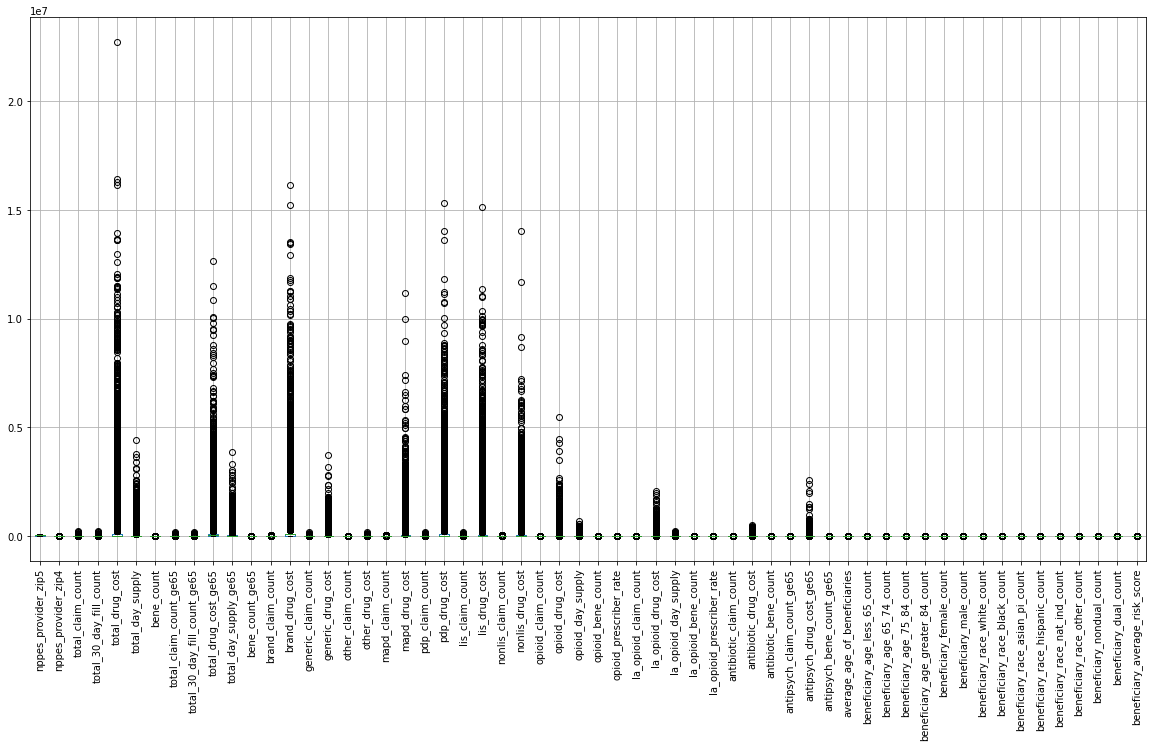

In [30]:
DataFrame.boxplot(figsize=(20,10), rot=90)